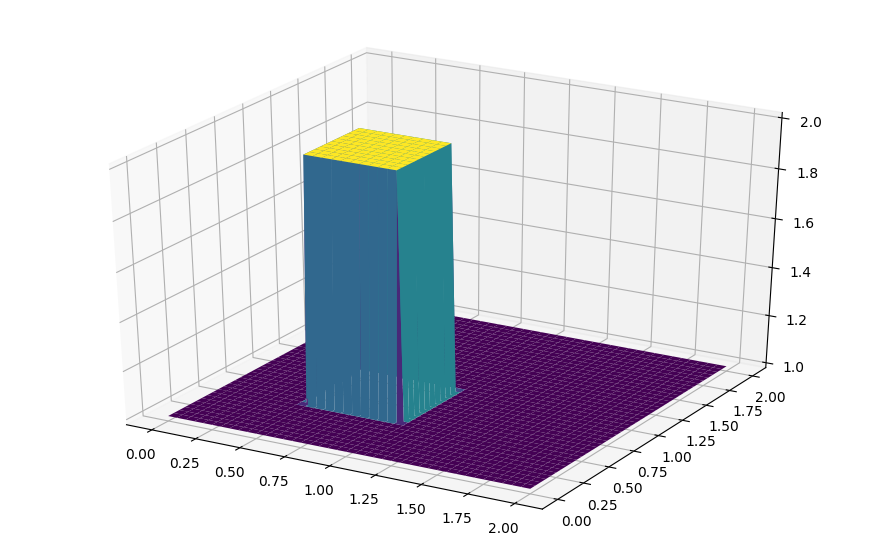

In [16]:
from mpl_toolkits.mplot3d import Axes3D  #3d axes plotting library

import numpy
from matplotlib import pyplot, cm
%matplotlib inline

#variable declarations
nx = 81
ny = 81
nt = 500
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

#initial conditions

# u = 2 for 0.5 < x < 1 and 0.5 < y < 1
u[int(0.5 / dy):int(1 / dy + 1),int(0.5 / dx):int(1 / dx + 1)] = 2

#plot initial conditions
fig = pyplot.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [ ]:
#Loop operations
"""
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    row, col = u.shape
    for j in range(1,row):
        for i in range(1,col):
            u[j,i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) - 
                                 (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0,:] = 1
            u[-1,:] = 1
            u[:,0] = 1
            u[:,-1] = 1
"""

#Array operations

u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1

#3d plot
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)